# Árvore de Decisão
Esse é um exemplo de uma Árvore de Decisão usando python com as bibliotecas de machine learning como o Pandas, Numpy e SKLearn.

O data set usado é o clássico IRIS
- https://pt.wikipedia.org/wiki/Conjunto_de_dados_flor_Iris

![Flores de Iris](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

Importação das bibliotecas
- pandas
- numpy
- sklearn

De dentro do sklearn trazemos um conjunto de dados (dataset) chamado iris.

O conjunto de dados **flor Iris** ou conjunto de dados **Iris de Fisher** é um conjunto de dados multivariados introduzido pelo estatístico e biólogo britânico **Ronald Fisher** em seu artigo de 1936.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
caracteristicas = ['c_sepala(cm)', 'l_sepala(cm)', 'c_petala(cm)', 'l_petala(cm)']
especies = ["Setosa", "Versicolo", "Virginica"]

Acima, alguns ajustes nas colunas do dataset são feitos atribuindo os dados às variáveis X e y que serãão usadas para o treino do modelo.

In [ ]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns = caracteristicas)
y = iris.target
#print(X[90:])
#print(y[100:])

Usando o algotimo "**DecisionTreeClassifier**" do SKLearn alimentamos o modelo.
A função fit é usada para treinar o modelo, com base nas entradas X
('SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth') deve
aprender a classificar y ('Class').

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1234, criterion='entropy') # max_depth=3
model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

O trecho a seguir brasicamente prepara as ferramentas para a geraão da imagem relacionada que será apresentada mais adiante usando uma linguagem simples de desenhos de diagramas chamada **dotLang**. Para isso a biblioteca **GraphViz** é carregada

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
    model, 
    'tree.dot', 
    feature_names = caracteristicas, 
    class_names=especies,
    filled=True,
    rounded=True,
    special_characters=True)

Ao iniciarmos uma linha no JupyterNotebooks com o simbolo de exclamação "!" ele executa a linha como entrada de console e não como parte do programa.

o programa **dot** recebe um arquivo **tree.dot** e gera uma imagem **tree.png**

In [ ]:
! dot -Tpng tree.dot -o tree.png

A imagem é mostrada usando os recursos da biblioteca **MatPlotLib**.

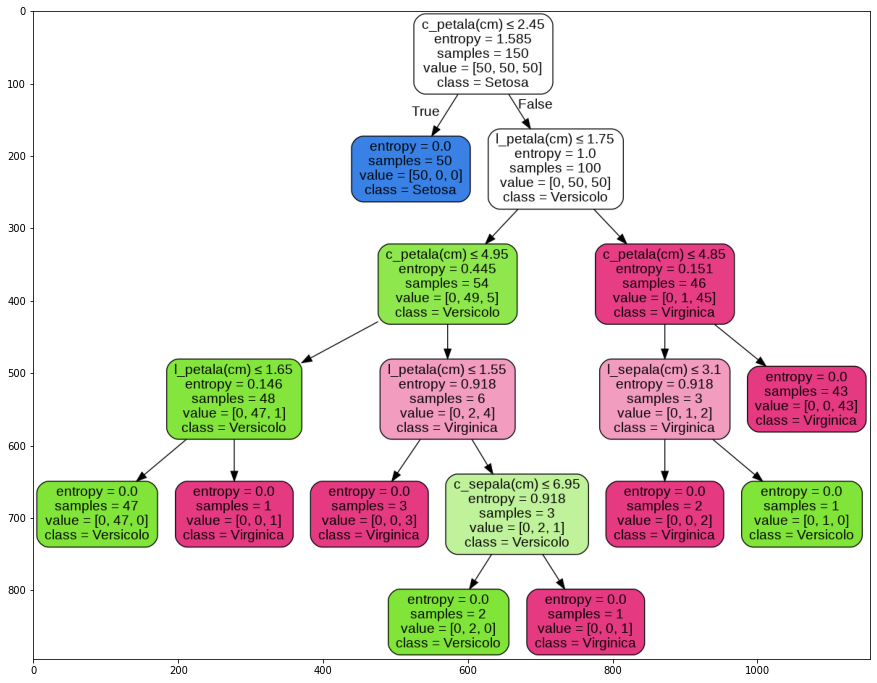

In [ ]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (15, 15))
plt.imshow(img)

In [ ]:
novas_flores = [[4.7, 3.2, 1.3, 0.2], [7.7, 3.0, 6.1, 2], [5.5,2.5,4.0,1.3]]
model.predict(novas_flores)

array([0, 2, 1])